# ダミーデータの作成

## 【問題1】乱数の作成
### 平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。
多次元の正規分布による乱数はnp.random.multivariate_normal()を使うことで作成できます。

作成したndarrayのshapeは(500, 2)になります。

《シード値について》

実行ごとに値が変わらないように、np.random.seed()により乱数のシード値を固定しておきましょう。今回シード値は0を使うことにします。

np.random.seed(0)

> 分散は「（各データの平均値からの距離）の２乗の平均」。
分散は2乗であることに注意。

> numpy.random.seed(seed=シードに用いる値) をシード (種) を指定することで、発生する乱数をあらかじめ固定することが可能です。乱数を用いる分析や処理で、再現性が必要な場合などに用いられます。

In [82]:
import numpy as np
import matplotlib.pyplot as plt


#2変数の平均値を指定
mean_first = (-3, 0)
#2変数の分散共分散行列を指定
# cov = np.array([[1.0,0.8],[0.8,1.0]]) # diagonal covariance 
cov_first = [[1.0,0.8],[0.8,1.0]]
# print(cov)

# シード値固定
np.random.seed(0)

#2次元正規乱数
dammy_data_first = np.random.multivariate_normal(mean_first, cov_first, (500))
print(dammy_data_first.shape)
# print(dammy_data)

(500, 2)


## 【問題2】散布図による可視化

### 問題1で作成したデータ点を散布図により可視化してください。


### 散布図はmatplotlibのplt.scatter()を使うことで描けます。

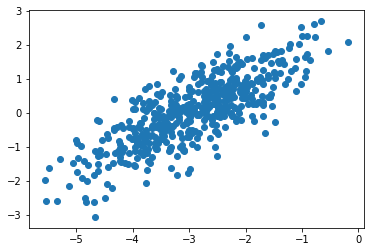

In [83]:
plt.scatter(dammy_data_first[:, 0], dammy_data_first[:, 1])
plt.show()

## 【問題3】ヒストグラムによる可視化

### 問題1で作成したデータをヒストグラムにより可視化してください。

### ヒストグラムはplt.hist()を使うことで描けます。

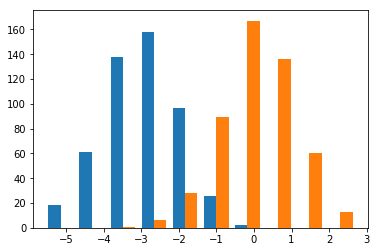

In [84]:
plt.hist(dammy_data_first)
plt.show()

### 各次元ごとに作成し、2つのヒストグラムとしてください。

### それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。

> dammy_data_first[:, 0]

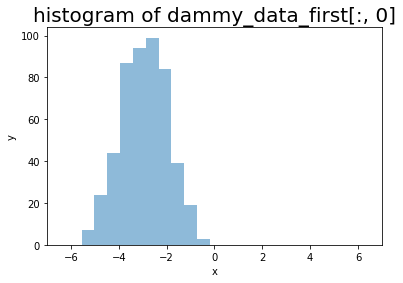

In [85]:
plt.xlim(-7, 7)                 # (1) x軸の表示範囲
# plt.ylim(0, 30)                 # (2) y軸の表示範囲
plt.title("histogram of dammy_data_first[:, 0]", fontsize=20)  # (3) タイトル
plt.xlabel("x", fontsize=10)            # (4) x軸ラベル
plt.ylabel("y", fontsize=10)      # (5) y軸ラベル
 
# グラフの描画
plt.hist(dammy_data_first[:, 0] , alpha=0.5) #(8) ヒストグラムの描画
plt.show()

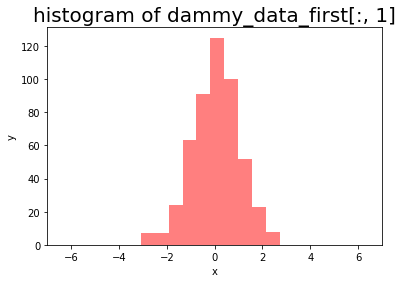

In [86]:
plt.xlim(-7, 7)                 # (1) x軸の表示範囲
# plt.ylim(0, 30)                 # (2) y軸の表示範囲
plt.title("histogram of dammy_data_first[:, 1]", fontsize=20)  # (3) タイトル
plt.xlabel("x", fontsize=10)            # (4) x軸ラベル
plt.ylabel("y", fontsize=10)      # (5) y軸ラベル
 
# グラフの描画
plt.hist(dammy_data_first[:, 1], alpha=0.5, color= 'r') #(8) ヒストグラムの描画
plt.show()

## 【問題4】データの追加
### 新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

In [89]:
#2変数の平均値を指定
mean_fourth = (0, -3)
#2変数の分散共分散行列を指定
# cov = np.array([[1.0,0.8],[0.8,1.0]]) # diagonal covariance 
cov_fourth = [[1.0,0.8],[0.8,1.0]]
# print(cov)

# シード値固定
np.random.seed(0)

#2次元正規乱数
dammy_data_fourth = np.random.multivariate_normal(mean_fourth, cov_fourth, (500))
print(dammy_data_fourth.shape)
# print(dammy_data_fourth)

(500, 2)


### そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題4のものは1を表示してください。

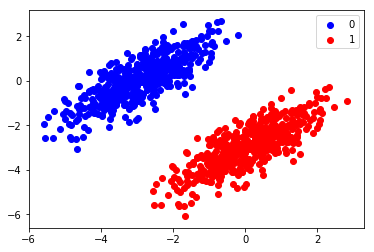

In [98]:
plt.scatter(dammy_data_first[:, 0], dammy_data_first[:, 1], marker="o",c='b',label="0")
plt.scatter(dammy_data_fourth[:, 0], dammy_data_fourth[:, 1], marker="o",c='r', label="1")
plt.legend()
plt.show()

## 【問題5】データの結合
### データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。結合はnp.concatenate()やnp.vstack()を使うことで行えます。

In [122]:
mix = np.concatenate([dammy_data_first, dammy_data_fourth])
print(mix.shape)

(1000, 2)


## 【問題6】ラベル付け
### ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。問題1のものには0、問題4のものには1を対応させます。
### 0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。
### 機械学習に使用するデータセットはこのような形になっていることが多いです。

In [129]:
# 0の配列を５００個
zero_ndarray = np.zeros(500)
# 1の配列を５００個
one_ndarray = np.ones(500)

#　0の配列を５００個と1の配列を５００個を同じ配列に追加
two_ndarray = np.insert(one_ndarray, 0, zero_ndarray, axis=0)

# shape(1000, 2)の配列の3列目に0と1の配列を１０００個を追加
three_ndarray = np.insert(mix, 2, two_ndarray, axis=1)
print(three_ndarray.shape)
print(three_ndarray)

(1000, 3)
[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]
 ...
 [-0.40484501 -3.14372258  1.        ]
 [ 0.1584315  -2.78199606  1.        ]
 [ 1.20196495 -2.02452628  1.        ]]
